<a href="https://colab.research.google.com/github/Kirtiwardhan01/Air-Quality-Dataset/blob/master/TechMahindra_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Reading the data

In [0]:
AQ = pd.read_csv(r"C:\Users\hp\Desktop\kirtiwardhan\Data Science task\Recruitment task\AirQualityUCI.csv")
print(AQ.head())

        Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0  10/3/2004  18.00.00     2.6         1360     150.0      11.9   
1  10/3/2004  19.00.00     2.0         1292     112.0       9.4   
2  10/3/2004  20.00.00     2.2         1402      88.0       9.0   
3  10/3/2004  21.00.00     2.2         1376      80.0       9.2   
4  10/3/2004  22.00.00     1.6         1272      51.0       6.5   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0           1046      166          1056      113          1692       1268.0   
1            955      103          1174       92          1559        972.0   
2            939      131          1140      114          1555       1074.0   
3            948      172          1092      122          1584       1203.0   
4            836      131          1205      116          1490       1110.0   

      T    RH      AH  
0  13.6  48.9  0.7578  
1  13.3  47.7  0.7255  
2  11.9  54.0  0.7502  
3  11.0  60.0  0.7867  
4 

In [0]:
#Split hour from time into new column
AQ['Hour']=AQ['Time'].apply(lambda x: int(x.split('.')[0]))
AQ.Hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Hour, dtype: int64

In [0]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null int64
NMHC(GT)         9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null int64
NOx(GT)          9357 non-null int64
PT08.S3(NOx)     9357 non-null int64
NO2(GT)          9357 non-null int64
PT08.S4(NO2)     9357 non-null int64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9356 non-null float64
Hour             9357 non-null int64
dtypes: float64(7), int64(7), object(2)
memory usage: 1.1+ MB


In [0]:
AQ.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
0,10/3/2004,18.00.00,2.6,1360,150.0,11.9,1046,166,1056,113,1692,1268.0,13.6,48.9,0.7578,18
1,10/3/2004,19.00.00,2.0,1292,112.0,9.4,955,103,1174,92,1559,972.0,13.3,47.7,0.7255,19
2,10/3/2004,20.00.00,2.2,1402,88.0,9.0,939,131,1140,114,1555,1074.0,11.9,54.0,0.7502,20
3,10/3/2004,21.00.00,2.2,1376,80.0,9.2,948,172,1092,122,1584,1203.0,11.0,60.0,0.7867,21
4,10/3/2004,22.00.00,1.6,1272,51.0,6.5,836,131,1205,116,1490,1110.0,11.2,59.6,0.7888,22


About Missing Data From data description, Missing values are tagged with -200 value. Let's check missing data

In [0]:
AQ = AQ.replace(-200,np.nan)

AQ_missing = AQ.isnull().sum().sort_values(ascending=False)
AQ_missing = pd.DataFrame(AQ_missing).reset_index()
AQ_missing.columns = ['Feature', 'Number of Data Records Missing']
AQ_missing.head()

,Feature,Number of Data Records Missing
0,NMHC(GT),8442
1,CO(GT),1682
2,NO2(GT),1641
3,NOx(GT),1638
4,AH,367


We first try to clean the data by visualising any NA/null values in the data set

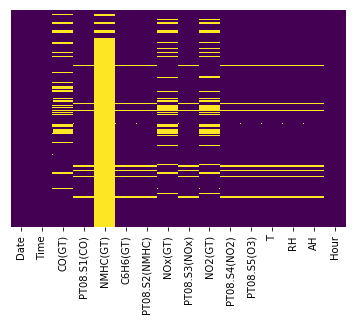

In [0]:
sns.heatmap(AQ.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [0]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           7675 non-null float64
PT08.S1(CO)      8990 non-null float64
NMHC(GT)         915 non-null float64
C6H6(GT)         8991 non-null float64
PT08.S2(NMHC)    8990 non-null float64
NOx(GT)          7719 non-null float64
PT08.S3(NOx)     8990 non-null float64
NO2(GT)          7716 non-null float64
PT08.S4(NO2)     8991 non-null float64
PT08.S5(O3)      8991 non-null float64
T                8991 non-null float64
RH               8991 non-null float64
AH               8990 non-null float64
Hour             9357 non-null int64
dtypes: float64(13), int64(1), object(2)
memory usage: 1.1+ MB


Visualize the percentage of 5 features with most data missing

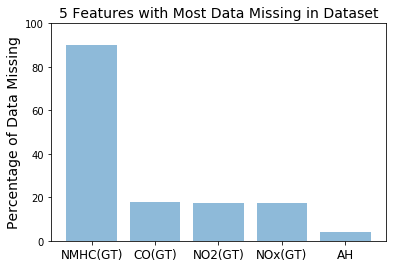

In [0]:
AQ_missingpercent = 100 * (AQ.isnull().sum()/AQ.isnull().count()).sort_values(ascending=False)

plt.Figure(figsize=(7,7),dpi = 400)
plt.bar(np.arange(5), AQ_missingpercent[:5], align='center', alpha=0.5)
plt.xticks(np.arange(5), AQ_missingpercent.index[:5], fontsize=12)
plt.ylim(0, 100)
plt.ylabel('Percentage of Data Missing', fontsize = 14)
plt.title('5 Features with Most Data Missing in Dataset', fontsize = 14) 
# plt.savefig('5 Features with Most Data Missing in Dataset.jpg')
plt.show()

Drop Redundant Features & Replace Missing Data

Feature 'NMHC(GT)' has more than 80% data missing, drop it

Thus we can remove this column from the dataset as these values are very less likely to be of any significant importance in this dataset

Analyze the correlations of all remaining features, drop redundant features

Replace missing data in remaining features



In [0]:
AQ = AQ.drop(['NMHC(GT)'], axis = 1)

In [0]:
AQ['T'].value_counts(dropna= False)

 NaN     366
 20.8     57
 21.3     54
 20.2     51
 13.8     51
 15.6     49
 12.3     49
 12.0     49
 19.8     48
 16.3     48
 14.5     47
 14.6     47
 17.8     46
 13.7     46
 21.7     46
 19.3     46
 13.4     46
 14.8     45
 16.0     45
 13.5     45
 13.3     45
 23.7     44
 14.1     44
 13.1     43
 15.5     43
 19.7     43
 15.8     41
 11.3     41
 20.3     41
 14.0     41
        ... 
 42.2      2
 40.6      2
 43.4      1
 57.2      1
 0.1       1
-1.1       1
 41.7      1
 36.7      1
 39.4      1
 42.7      1
 44.6      1
-0.3       1
 42.6      1
 43.1      1
 42.5      1
-0.2       1
 1.1       1
-1.2       1
-1.4       1
-1.9       1
 0.7       1
 41.0      1
 1.7       1
 41.6      1
 0.5       1
-0.5       1
 0.0       1
 40.9      1
 44.3      1
 40.7      1
Name: T, Length: 438, dtype: int64

In [0]:
AQ['CO(GT)'].value_counts(dropna= False)

NaN       1682
1.0        305
1.4        279
1.6        275
1.5        273
1.1        262
0.7        260
1.7        258
1.3        253
0.8        251
0.9        248
1.2        247
0.6        244
1.9        232
2.0        221
2.1        218
0.5        217
2.2        202
2.3        191
1.8        185
2.4        172
2.6        161
0.4        160
2.5        152
2.7        149
2.8        136
3.1        118
2.9        118
3.0        114
3.4        113
          ... 
6.7          8
7.5          6
7.3          5
6.9          5
8.0          5
8.4          5
8.6          4
7.2          4
7.7          4
7.9          3
8.7          3
8.1          3
7.4          3
7.8          2
7.1          2
10.2         2
8.3          2
9.1          2
1428.0       1
10.1         1
9.2          1
7.0          1
9.3          1
9.5          1
8.5          1
11.5         1
9.9          1
7.6          1
9.4          1
11.9         1
Name: CO(GT), Length: 98, dtype: int64

In [0]:
AQ['NOx(GT)'].value_counts(dropna= False)

NaN       1638
89.0        41
65.0        37
41.0        36
122.0       36
93.0        36
180.0       35
95.0        35
132.0       35
51.0        34
120.0       34
102.0       33
57.0        32
104.0       32
72.0        32
103.0       32
98.0        32
166.0       32
111.0       32
61.0        32
112.0       32
46.0        32
96.0        31
108.0       31
115.0       31
144.0       31
109.0       30
75.0        30
147.0       30
126.0       30
          ... 
1200.0       1
887.0        1
1235.0       1
1186.0       1
955.0        1
774.0        1
1188.0       1
1358.0       1
830.0        1
898.0        1
918.0        1
963.0        1
636.0        1
964.0        1
688.0        1
804.0        1
578.0        1
877.0        1
851.0        1
661.0        1
1479.0       1
647.0        1
1054.0       1
1074.0       1
1110.0       1
1301.0       1
458.0        1
794.0        1
772.0        1
797.0        1
Name: NOx(GT), Length: 926, dtype: int64

In [0]:
AQ['NO2(GT)'].value_counts(dropna= False)

NaN       1641
97.0        78
119.0       77
117.0       77
114.0       75
95.0        75
101.0       75
110.0       74
115.0       73
107.0       72
116.0       72
102.0       71
96.0        71
121.0       71
127.0       71
99.0        70
111.0       70
112.0       70
81.0        70
106.0       69
68.0        69
120.0       68
94.0        68
89.0        68
93.0        67
69.0        66
83.0        65
91.0        65
90.0        64
109.0       64
          ... 
260.0        2
265.0        2
255.0        2
340.0        1
326.0        1
322.0        1
237.0        1
333.0        1
291.0        1
284.0        1
274.0        1
296.0        1
301.0        1
295.0        1
312.0        1
309.0        1
278.0        1
310.0        1
306.0        1
13.0         1
281.0        1
2.0          1
7.0          1
3.0          1
1779.0       1
261.0        1
256.0        1
253.0        1
257.0        1
285.0        1
Name: NO2(GT), Length: 285, dtype: int64

We can replace these NaN values by taking the mean whole column, but this won't be accurate and proper way to fill those values. 
Thus, filling the mean of that perticular day in which day the value is NaN makes more sense and would be proper way to impute the values

In [0]:
AQ["T"] = AQ.groupby("Date")["T"].transform(lambda x: x.fillna(x.mean()))

In [0]:
AQ["CO(GT)"] = AQ.groupby("Date")["CO(GT)"].transform(lambda x: x.fillna(x.mean()))

In [0]:
AQ["NOx(GT)"] = AQ.groupby("Date")["NOx(GT)"].transform(lambda x: x.fillna(x.mean()))
AQ["NO2(GT)"] = AQ.groupby("Date")["NO2(GT)"].transform(lambda x: x.fillna(x.mean()))

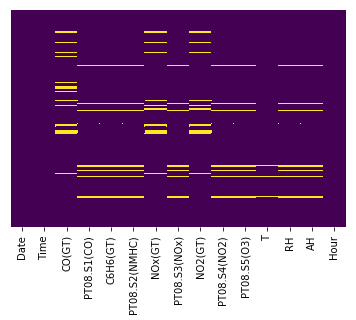

In [0]:
sns.heatmap(AQ.isnull(),yticklabels=False,cbar=False,cmap='viridis')

We can see there are still some NaN values, this is because for these values. We fill these values using Forward Fill way inside the fillna function, using method 'ffill'. 

We use forward fill here as even now taking the mean of the whole column(which has values for an entire year) does not make sense. 

Hence as these are hourly values and thus forward fill will be a very good method to fill thses values instead of dropping these records.

In [0]:
AQ.fillna(method='ffill', inplace= True)

In [0]:
AQ.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
Hour             False
dtype: bool

In [0]:
AQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null object
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
Hour             9357 non-null int64
dtypes: float64(12), int64(1), object(2)
memory usage: 1.1+ MB


The describe method is used to find the summary statistics for every column

Now that the data is all cleaned and free of NaN values, we can start the with plots and Exploratory Analysis

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F530D2588>,
      dtype=object)

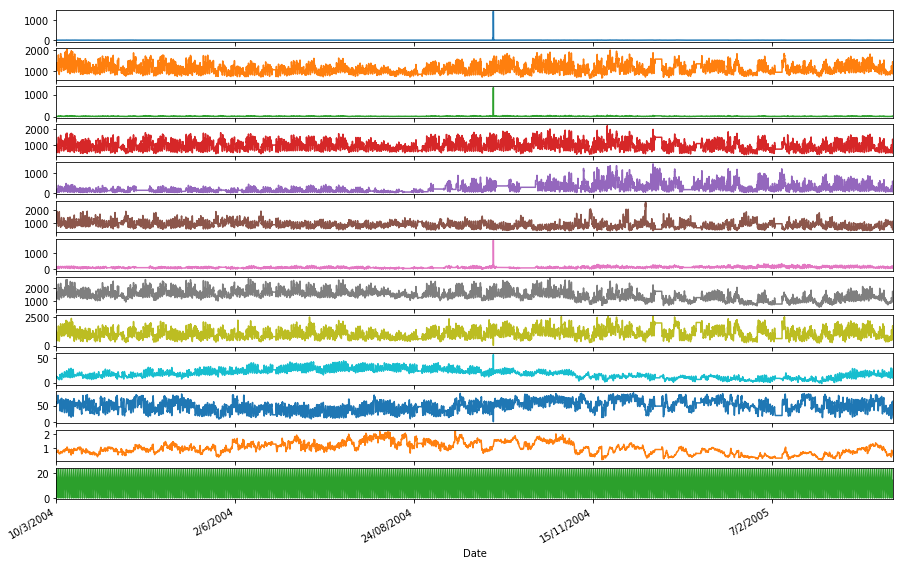

In [0]:
AQ.plot(x='Date',subplots=True, figsize=(15, 10),legend=False)

distplots for all the columns. Distplot provides a quick way to look at the univariate distribution.

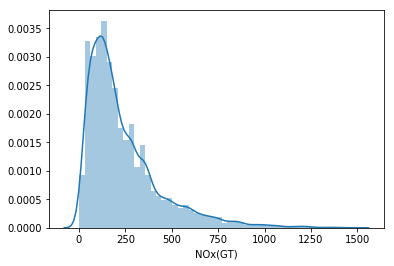

In [0]:
sns.distplot(AQ["NOx(GT)"])

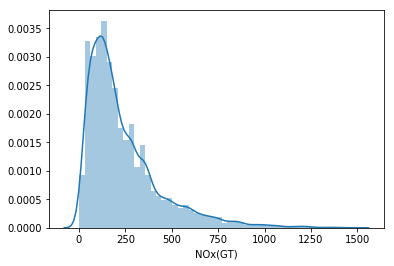

In [0]:
sns.distplot(AQ["NOx(GT)"])

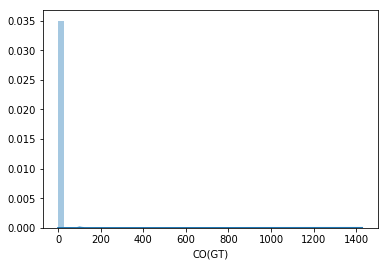

In [0]:
sns.distplot(AQ["CO(GT)"])

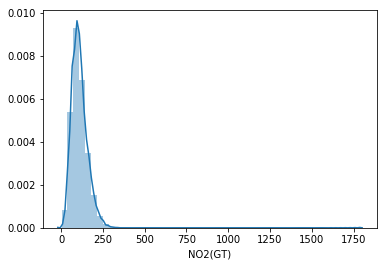

In [0]:
sns.distplot(AQ["NO2(GT)"])

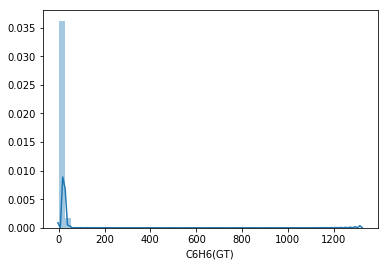

In [0]:
sns.distplot(AQ["C6H6(GT)"])

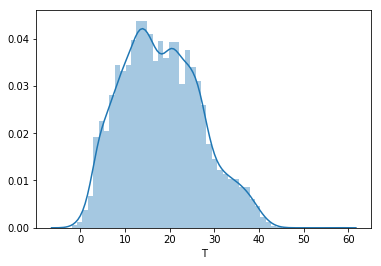

In [0]:
sns.distplot(AQ["T"])

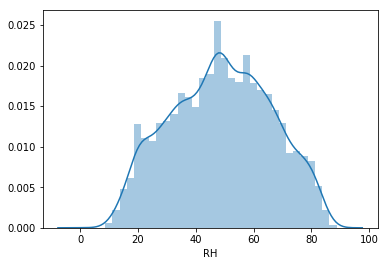

In [0]:
sns.distplot(AQ["RH"])

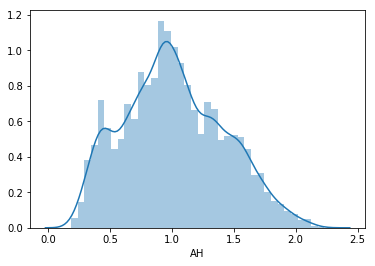

In [0]:
sns.distplot(AQ["AH"])

In [0]:
AQ.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,2.343635,1102.749813,10.329336,942.587902,239.462860,832.730683,109.708755,1452.997649,1030.340665,18.171599,48.811448,1.017378,11.498557
std,15.181152,219.624973,15.519617,269.664306,200.865596,255.724894,49.425513,347.422078,411.004538,8.842895,17.361085,0.404827,6.923182
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,18.600000,-1.900000,1.214600,0.184700,0.000000
25%,1.100000,938.000000,4.400000,733.000000,102.000000,655.000000,76.000000,1228.000000,726.000000,11.500000,35.400000,0.726200,5.000000
50%,1.700000,1062.000000,8.300000,911.000000,177.000000,807.000000,103.608696,1460.000000,964.000000,17.600000,48.900000,0.987500,11.000000
75%,2.700000,1237.000000,14.000000,1117.000000,316.000000,968.000000,135.000000,1677.000000,1286.000000,24.300000,61.900000,1.306700,18.000000
max,1428.000000,2040.000000,1321.000000,2214.000000,1479.000000,2683.000000,1779.000000,2775.000000,2523.000000,57.200000,88.700000,2.231000,23.000000


In [0]:
AQ['Date']=pd.to_datetime(AQ.Date, format='%d/%m/%Y')   #Format date column

In [0]:
# set the index as date              #Create month column (Run once)
AQ.set_index('Date',inplace=True)

In [0]:
AQ['Month']=AQ.index.month     #Create month column (Run once)
AQ.reset_index(inplace=True)
#AQ.head()

# Understand co-relation between variables 

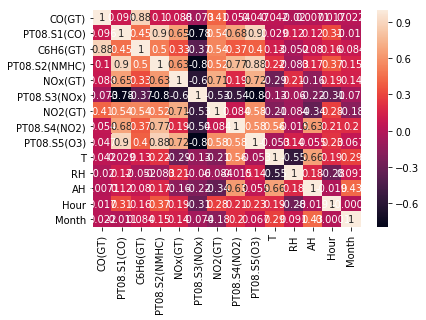

In [0]:
sns.heatmap(AQ.corr(), annot=True)

In [0]:
#correlation values table
print(AQ.corr())

                 CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)   NOx(GT)  \
CO(GT)         1.000000     0.096014  0.884811       0.101449  0.088017   
PT08.S1(CO)    0.096014     1.000000  0.452749       0.896053  0.651126   
C6H6(GT)       0.884811     0.452749  1.000000       0.503796  0.326156   
PT08.S2(NMHC)  0.101449     0.896053  0.503796       1.000000  0.625471   
NOx(GT)        0.088017     0.651126  0.326156       0.625471  1.000000   
PT08.S3(NOx)  -0.073272    -0.777939 -0.373528      -0.798119 -0.598668   
NO2(GT)        0.414381     0.539702  0.544331       0.521854  0.711478   
PT08.S4(NO2)   0.054372     0.676293  0.373017       0.769578  0.186661   
PT08.S5(O3)    0.047420     0.900281  0.397653       0.875184  0.721350   
T              0.041964     0.028515  0.127498       0.222649 -0.286413   
RH            -0.019547     0.119222 -0.051562      -0.082917  0.209296   
AH             0.007120     0.121725  0.079508       0.174913 -0.156227   
Hour           0.017207  

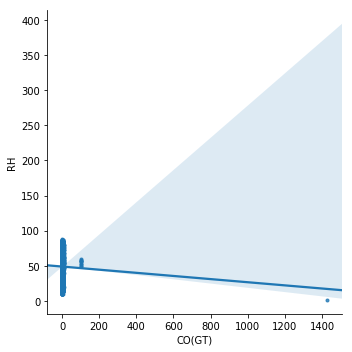

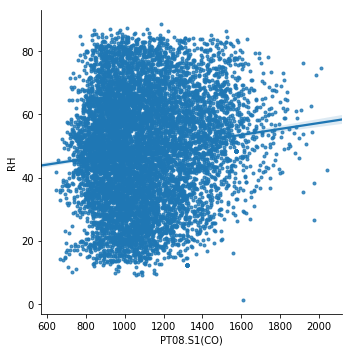

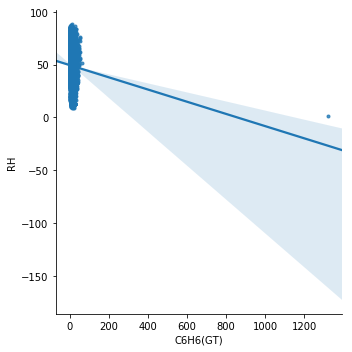

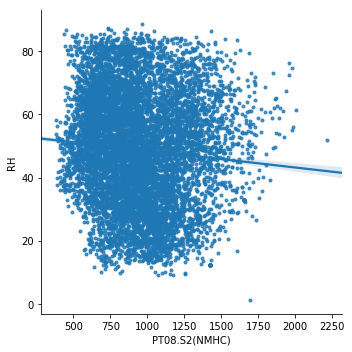

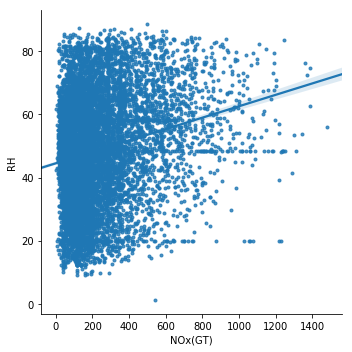

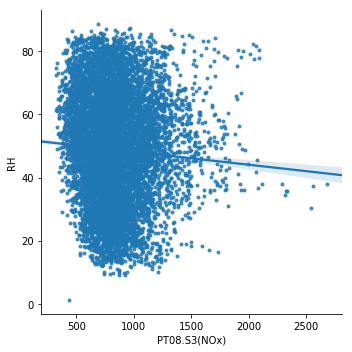

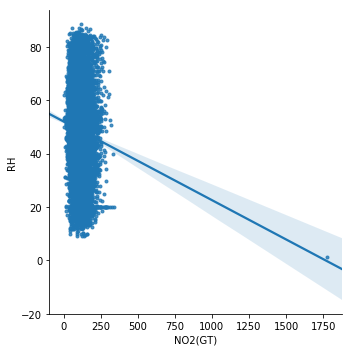

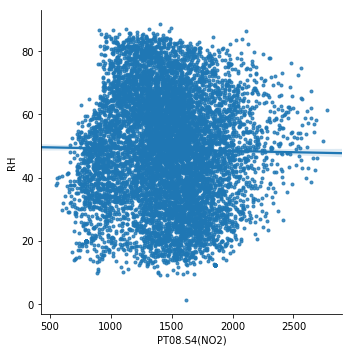

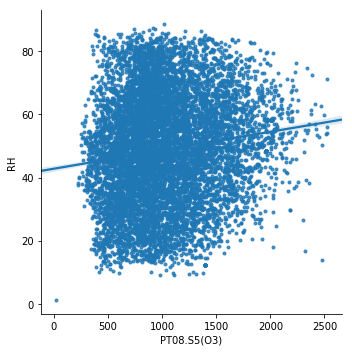

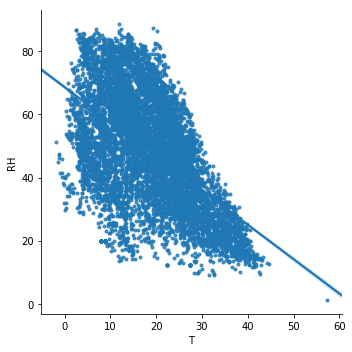

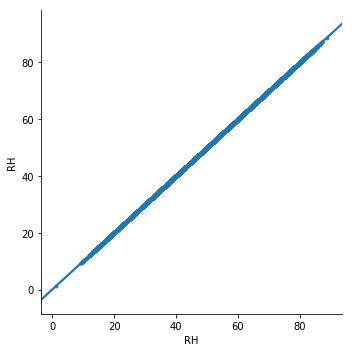

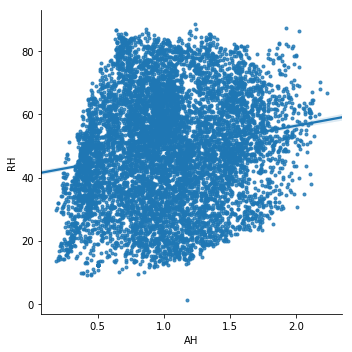

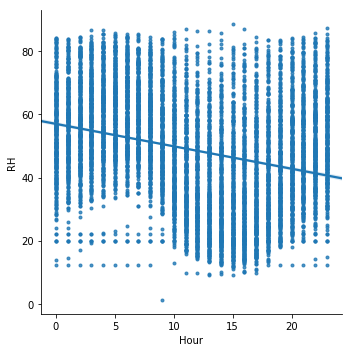

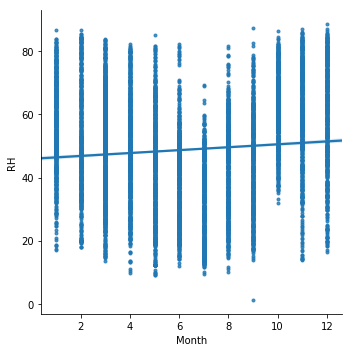

In [0]:
#plot all X-features against output variable RH
col_=AQ.columns.tolist()[2:]
for i in AQ.columns.tolist()[2:]:
    sns.lmplot(x=i,y='RH',data=AQ,markers='.')


In [0]:
from sklearn.preprocessing import StandardScaler         #import normalisation package
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression         
from sklearn.metrics import mean_squared_error,mean_absolute_error 

In [0]:
X=AQ[col_].drop('RH',1)     #X-input features
y=AQ['RH']                    #y-input features

# The basic of hypothesis is normalisation and standard normalisation

Normalize Feature variable

In [0]:
scaler=StandardScaler()     #Creating an instance

In [0]:
X_std=scaler.fit_transform(X)     #apply standardisation

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [0]:
X.shape,y.shape

((9357, 13), (9357,))

#Split the data into train and test with test size and 20% and train size as 80%

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=7)

In [0]:
print('Training data size:',X_train.shape)
print('Test data size:',X_test.shape)

Training data size: (7485, 13)
Test data size: (1872, 13)


In [0]:
reg = LinearRegression()

Train the model

In [0]:
AQ_model= reg.fit(X_train,y_train)   # fit linear model
AQ_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
print('Intercept:',AQ_model.intercept_)
print('--------------------------------')
print('Slope:')
list(zip(X.columns.tolist(),AQ_model.coef_))

Intercept: 51.29011424272224
--------------------------------
Slope:


[('CO(GT)', 0.13265862561119965),
 ('PT08.S1(CO)', 0.01107095538666889),
 ('C6H6(GT)', -0.08777914004771367),
 ('PT08.S2(NMHC)', -0.028937042077043503),
 ('NOx(GT)', 0.010583410356783104),
 ('PT08.S3(NOx)', -0.006392722422781499),
 ('NO2(GT)', -0.023628267243436998),
 ('PT08.S4(NO2)', 0.018514658027345553),
 ('PT08.S5(O3)', -0.0003819497973053038),
 ('T', -2.2431589973675483),
 ('AH', 30.711710513745615),
 ('Hour', -0.060298574996987875),
 ('Month', 0.3627455184423129)]

Doing Prediction

In [0]:
y_pred=AQ_model.predict(X_test)                      #predict using the model
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))      #calculate rmse
print('Baseline RMSE of model:',RMSE)

Baseline RMSE of model: 6.631859083921874


We can predict RH using all the features together with RMSE as 6.631 

Let us call it as baseline model

We will try with multiple feature combinations and see if RMSE is improving

In [0]:
# write function to measure RMSE
def train_test_RMSE(feature):
    X=AQ[feature]
    y=AQ['RH']
    X_std_one=scaler.fit_transform(X)
    X_trainR,X_testR,y_trainR,y_testR=train_test_split(X_std_one,y,test_size=0.2,random_state=7)
    AQ_model_one=reg.fit(X_trainR,y_trainR)
    y_predR=AQ_model_one.predict(X_testR)
    return np.sqrt(mean_squared_error(y_testR,y_predR))

In [0]:
col_.remove('RH')        #remove output

In [0]:
print('List of features:',col_)    #print list of features

List of features: ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH', 'Hour', 'Month']


In [0]:
print('RMSE with Features as',col_[0:2],train_test_RMSE(col_[0:2]))
print('-------------------------')
print('RMSE with Features as',col_[0:6],train_test_RMSE(col_[0:6]))
print('-------------------------')
print('RMSE with Features as',col_[0:9],train_test_RMSE(col_[0:9]))
print('-------------------------')
print('RMSE with Features as',col_[1:5],train_test_RMSE(col_[2:9]))
print('-------------------------')
print('RMSE with Features as',col_[0:11],train_test_RMSE(col_[0:11]))
print('-------------------------')
print('RMSE with Features as',col_[1:12],train_test_RMSE(col_[1:12]))
print('-------------------------')
print('RMSE with Features as',col_[0:13],train_test_RMSE(col_[0:13]))

RMSE with Features as ['CO(GT)', 'PT08.S1(CO)'] 16.992701270663556
-------------------------
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)'] 14.75182072113169
-------------------------
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'] 12.63318293646746
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)'] 13.111209247274969
-------------------------
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH'] 6.659099709512492
-------------------------
RMSE with Features as ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH', 'Hour'] 6.644853201451425
-------------------------
RMSE with Features as ['CO(GT)', 'PT08.S1(CO)'

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


After this experiment it looks that baseline model is performing best

In [0]:
from sklearn.model_selection import GridSearchCV        #import grid search cv

Let us apply Random Forest regression and measure RMSE

Fit the RF model and predict

In [0]:
from sklearn.ensemble import RandomForestRegressor           #import random forest regressor
rf_reg=RandomForestRegressor()

In [0]:
rf_model=rf_reg.fit(X_train,y_train)         #fit model   
y_pred_rf=rf_model.predict(X_test)           #predict

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [0]:
#Calculating RMSE
print('RMSE of predicted RH in RF model:',np.sqrt(mean_squared_error(y_test,y_pred_rf)))

RMSE of predicted RH in RF model: 0.9724714637783712


Lets try to improve on baseline RF model

In [0]:
#define rf parameters
rf_params={'n_estimators':[10,20],'max_depth':[8,10],'max_leaf_nodes':[70,90]}
#define rf grid search
rf_grid=GridSearchCV(rf_reg,rf_params,cv=10)

In [0]:
rf_model_two=rf_grid.fit(X_train,y_train)     #fit the model wtih all grid parameters
rf_model_two

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20], 'max_depth': [8, 10], 'max_leaf_nodes': [70, 90]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
y_pred_rf_two=rf_model_two.predict(X_test)        #predict
y_pred_rf_two

array([41.74193783, 46.13278283, 48.87541176, ..., 35.21348157,
       45.36588583, 71.17516027])

In [0]:
#Calculate RMSE
print('RMSE using RF grid search method',np.sqrt(mean_squared_error(y_test,y_pred_rf_two)))  

RMSE using RF grid search method 2.2494975540166418


Applying Random Forest regression the predicted RMSE has improved to 0.97, 

The default RF algorithm is giving better RMSE value than grid search applied different parameters

Let us try to apply Decision tree regression technique and see if any improvement happens

In [0]:
from sklearn.tree import DecisionTreeRegressor         #Decision tree regression model
from sklearn.model_selection import cross_val_score    #import cross validation score package
from sklearn.model_selection import GridSearchCV        #import grid search cv
dt_one_reg=DecisionTreeRegressor()

Fit the DT model and predict:

In [0]:
dt_model=dt_one_reg.fit(X_train,y_train)         #fit the model
y_pred_dtone=dt_model.predict(X_test)            #predict

RMSE of RH prediction

In [0]:
#calculate RMSE
print('RMSE of Decision Tree Regression:',np.sqrt(mean_squared_error(y_pred_dtone,y_test)))

RMSE of Decision Tree Regression: 1.3167599772194012


For designing the model for predicting RH, I have applied Linear Regression, Decision Tree, Random Forest

When tested on test data below are RMSE obtained from different algorithms:

RMSE:

-Linear Regression: 6.63

-Decision Tree: 1.32

-Random Forest: 0.97

We can compare the RMSE values and conclude that Random Forest algorithm is better algorithm for predicting RH values using the features
